In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [11]:
dataset_path = "/Users/kartiksharma/Desktop/Pest and Disease/Dataset"

train_dir = os.path.join(dataset_path, 'Train')
test_dir = os.path.join(dataset_path, 'Test')

# Change this code

In [12]:
train_data = ImageDataGenerator(rescale=1.0/255) 
test_data = ImageDataGenerator(rescale=1.0/255)


train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'    
)

test_generator = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print("Classes found in the dataset:", train_generator.class_indices)

# Do not change this code

Found 74317 images belonging to 22 classes.
Found 24981 images belonging to 22 classes.
Classes found in the dataset: {'anthracnose_cashew': 0, 'bacterial blight_cassava': 1, 'brown spot_cassava': 2, 'fall armyworm_maize': 3, 'grasshoper_maize': 4, 'green mite_cassava': 5, 'gumosis_cashew': 6, 'healthy_cashew': 7, 'healthy_cassava': 8, 'healthy_maize': 9, 'healthy_tomato': 10, 'leaf beetle_maize': 11, 'leaf blight_maize': 12, 'leaf blight_tomato': 13, 'leaf curl_tomato': 14, 'leaf miner_cashew': 15, 'leaf spot_maize': 16, 'mosaic_cassava': 17, 'red rust_cashew': 18, 'septoria leaf spot_tomato': 19, 'streak virus_maize': 20, 'verticulium wilt_tomato': 21}


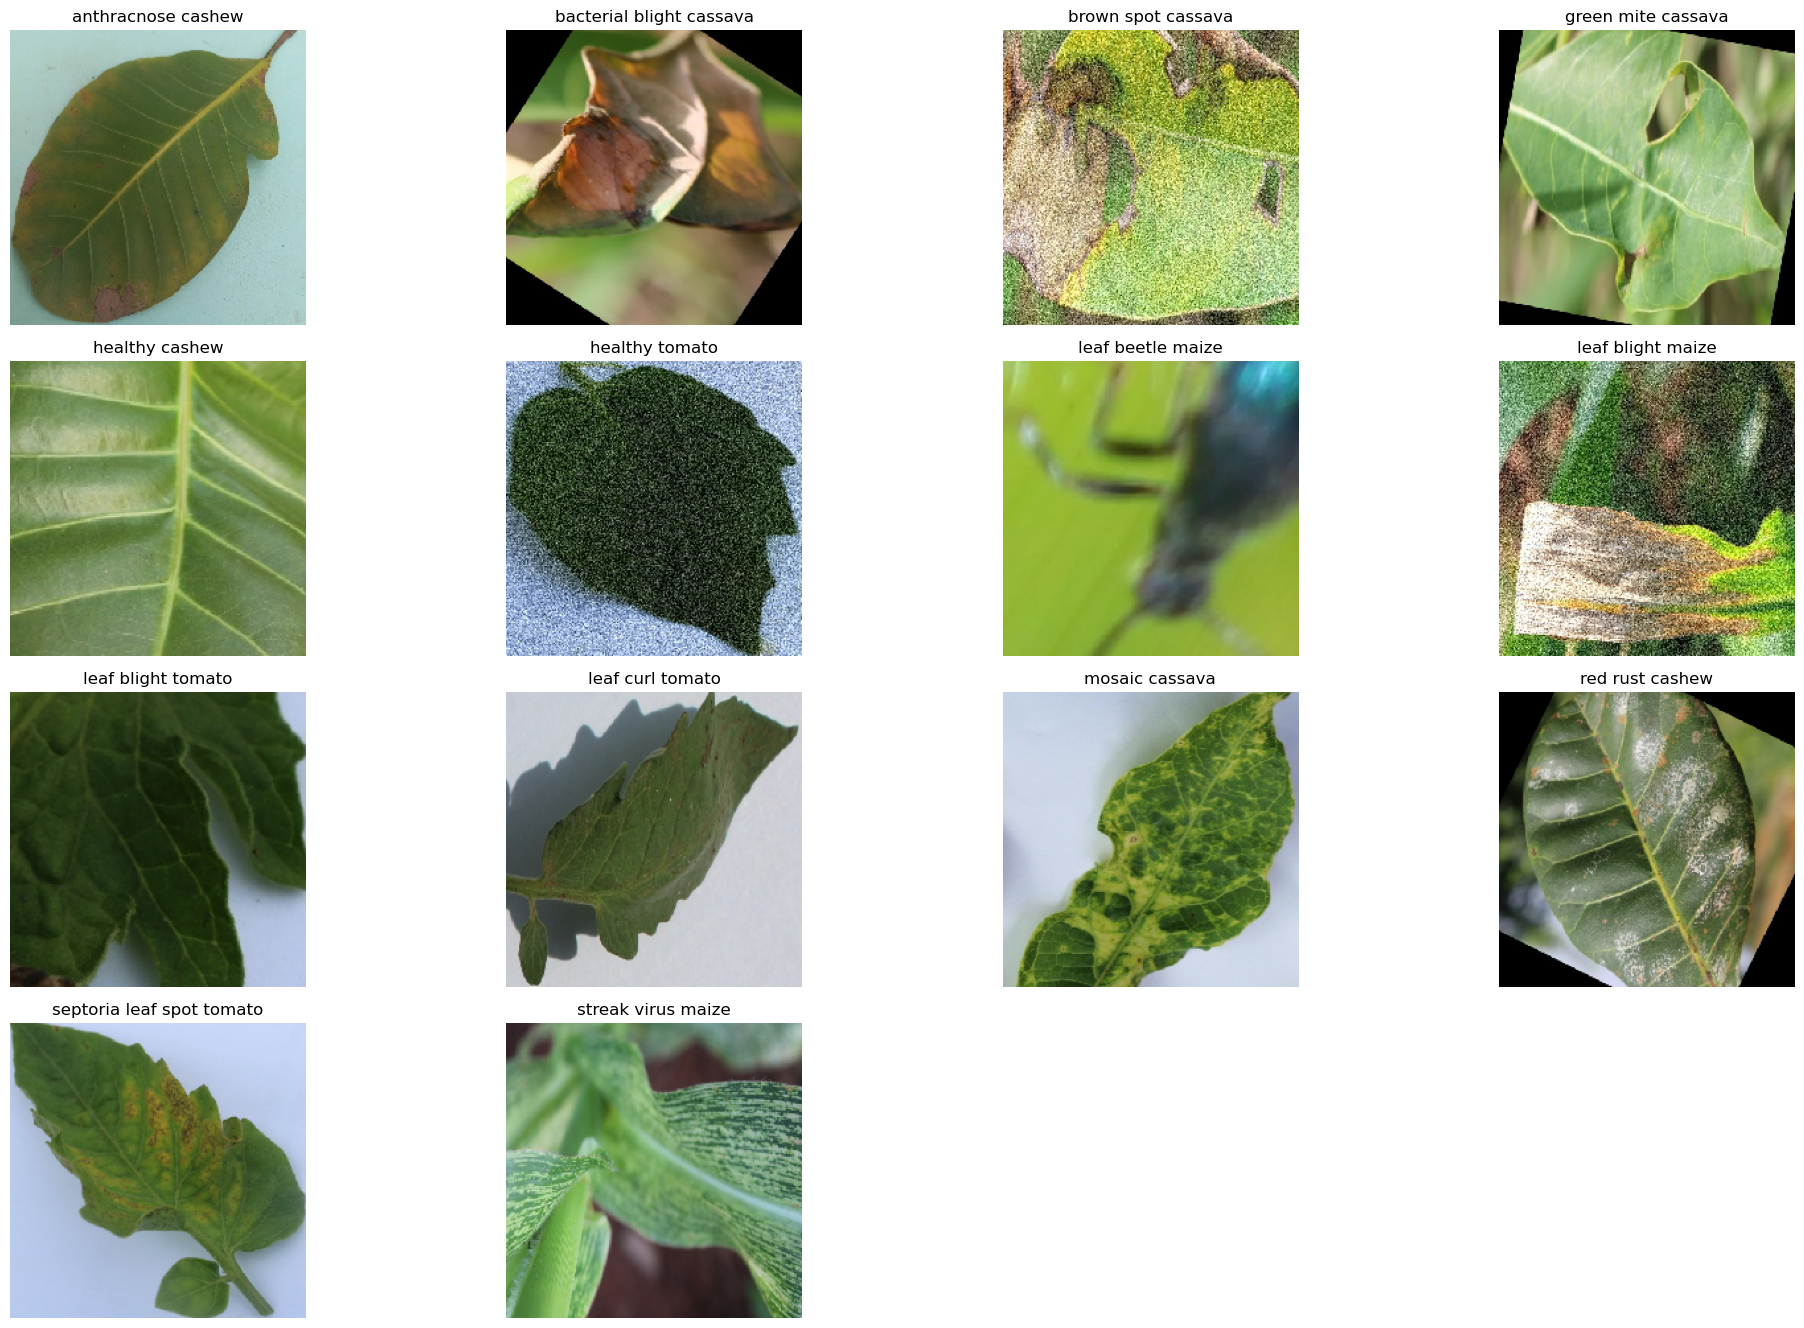

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch one complete batch of images and labels from the generator
images, labels = next(train_generator)  # Get one batch of data

# Find unique class indices from the batch
unique_classes, unique_indices = np.unique(np.argmax(labels, axis=1), return_index=True)

# Extract one image per class using the unique indices
selected_images = images[unique_indices]
class_names = np.array(list(train_generator.class_indices.keys()))[unique_classes]

# Display the selected images
plt.figure(figsize=(20, 20))
for idx, (img, class_name) in enumerate(zip(selected_images, class_names)):
    plt.subplot(6, 4, idx + 1)  # Adjust grid size for 22 classes
    plt.imshow(img)
    plt.title(class_name.replace('_', ' '))  # Format class name
    plt.axis('off')

plt.tight_layout()
plt.show()
